In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

with open("results_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
results_GE = get_results_for_p(p,all_results)

with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
model = get_results_for_p(p,all_results)

No results found for p = (3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)
(3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)
(3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)


In [3]:
#with open("results_GE.pkl", "rb") as file:
#    all_results = pickle.load(file)
#key = (3, 100, 6, 5, 1, 0.5, 1.0, 5.0, 0.85, 1.0, 1.0) #This is the key from the model of the same size, but no HMQ
# Check if the key exists in the saved results
#if key in all_results:
#        print(key)
#results_GE =    all_results[key]

In [4]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

J shape (3, 6, 11, 100, 6)
W shape (3, 6, 11, 100, 6, 2)
kappa 8.341326017510903
P [ 0.204628    0.20151903  0.19817484  0.19457497  0.19069683  0.18651541
  0.18200302  0.17712886  0.17185872  0.16615448  0.15997362  0.15326874
  0.14598696  0.13806941  0.1294508   0.12005919  0.10981636  0.09863931
  0.08644401  0.07315407  0.05871989  0.0431634   0.02669459  0.01010943
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0003752446702700156
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0003700006143711596
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0003902581518370603
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0004119319265415667
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0004726196173521884
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0005223222978417376
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star borders 0.0 5.0
Diff Rho: 0.0005707896208332749
q_star [0.71655453 0.71729006 0.71954638 0.72196824 0.72577355 0.72856314]
n0_star 

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:1042: RuntimeWarning: invalid value encountered in divide
  q_star = np.fmin((size[...,0]* np.minimum(self.p.q_0,1-sep_star)+size[...,1]*np.minimum(q,1-sep_star1))/(size[...,0]*(1-sep_star)+size[...,1]*(1-sep_star1)),1)


Diff Rho: 0.00026302252016173597


c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0003007700163342807
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0003661691253257816
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00038807825833334883
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00040254828701301754
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00037247042155938946
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000552881084103298
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005604966313906165
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005288289759272857
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005717094705806042
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005592168949211063
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:187: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:1042: RuntimeWarning: invalid value encountered in divide
  q_star = np.fmin((size[...,0]* np.minimum(self.p.q_0,1-sep_star)+size[...,1]*np.minimum(q,1-sep_star1))/(size[...,0]*(1-sep_star)+size[...,1]*(1-sep_star1)),1)


n0_star borders 0.0 5.0
Diff Rho: 0.00010913736527836457


c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00010660172470051721
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 7.721352898050769e-05
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 8.085910580171245e-05
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 9.572825542735374e-05
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00011494732253186943
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00039197459753830005
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00026763312380142265
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0002569247670689292
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00026036189771112557
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00023129511912787796
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star border

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:187: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


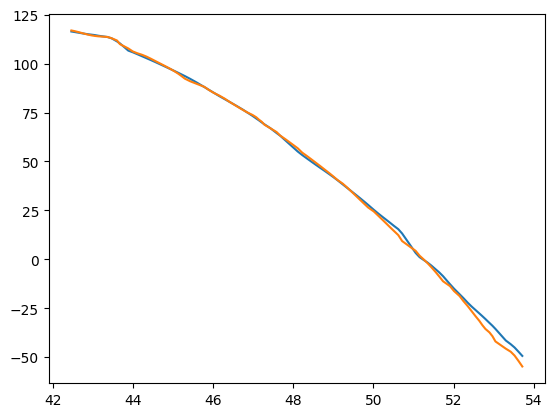

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00023989855739383234
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00029853331978596786
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00022044381545670592
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00021117005325806855
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00023142227731109716
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borde

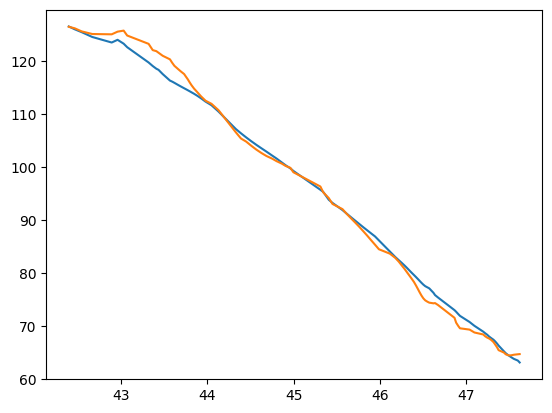

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.210771781401824
Diff Rho: 0.0006157059154869412
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.17960090330122
Diff Rho: 0.0005739389257400927
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005187469386877565
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00044823113384127595
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0003875477232599505
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0

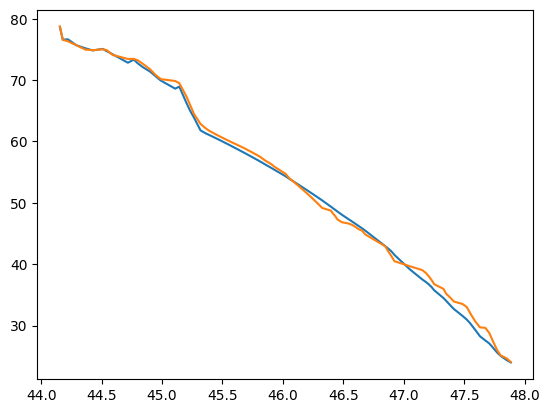

sep jun borders 0.0 0.9214149263143138
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006594623479593247
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005628878027929139
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.402447773585315
Diff Rho: 0.0008243330960541026
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.4909064227597835
Diff Rho: 0.0005973609428220439
sep jun borders 0.0 0.9475316232970786
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006123182665389683
sep jun borders 0.0 0.5322630371504251
sep sen borders 0.0 1.0
q_star [0.5  

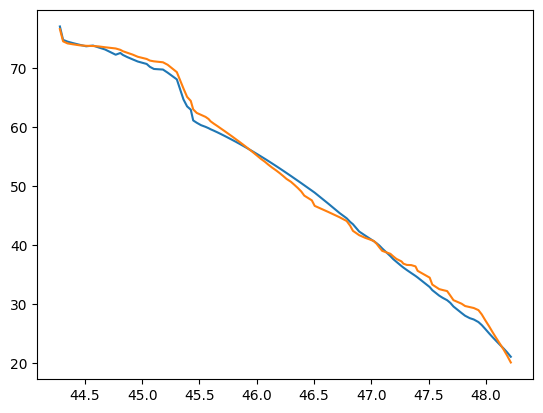

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00045935241770721734
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005822526262759391
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000510934748836265
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.210709105678157
Diff Rho: 0.00048081458713932716
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.200269072724289
Diff Rho: 0.0004365209756496113
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 

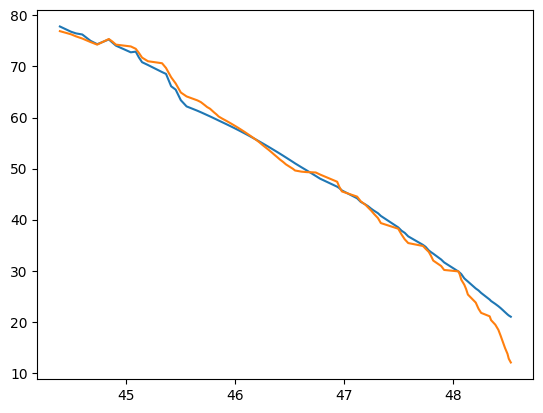

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0007355101372173986
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006784025164455609
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006884829605389795
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006233888509852588
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000686759078632226
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0

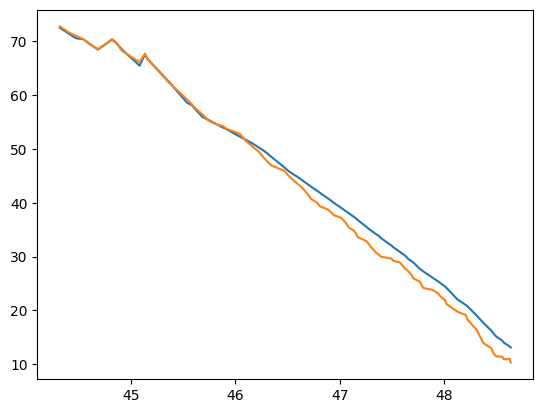

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005517678638271901
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004682663230399773
sep jun borders 0.0 0.5689601404174549
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005284967650618741
sep jun borders 0.0 0.9021224329322538
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005030154743219057
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005535750849918227
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984

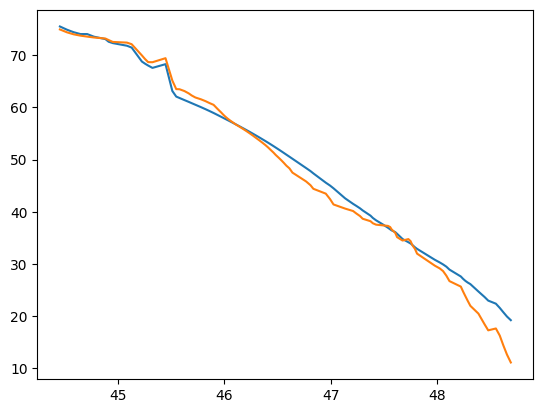

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006194205001923842
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000622588920533772
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.409556239808792
Diff Rho: 0.0006269760242356655
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.411717390736013
Diff Rho: 0.000938564213089148
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.435347133400278
Diff Rho: 0.0009665196586947939
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988

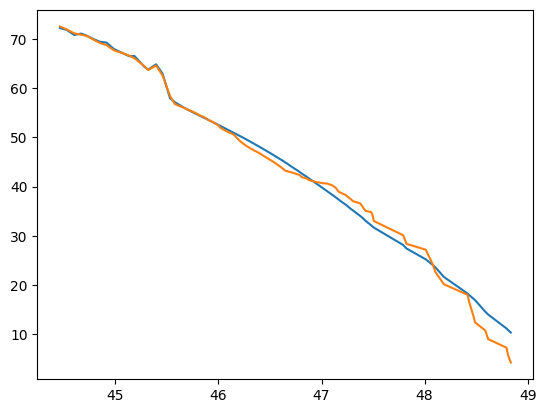

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005349066832068965
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005107030018562434
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005048524356999893
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005308587718619405
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005287385941028949
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.

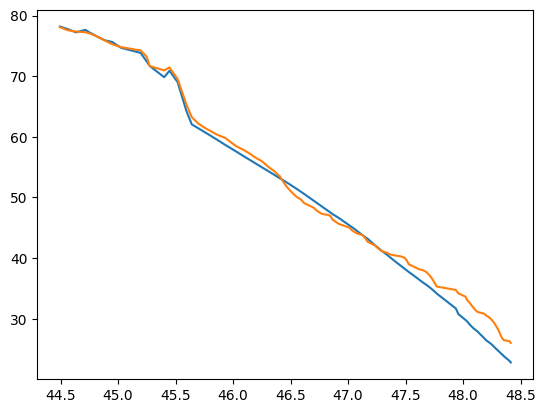

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006321857029282323
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00045493748055591265
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00047711262876386803
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004217579453145943
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00045249378953786216
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders

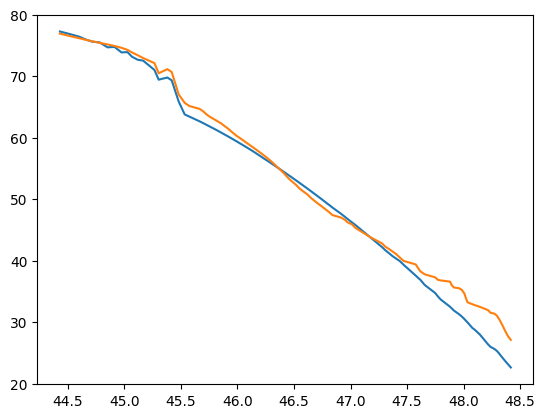

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004555729780926271
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000477687642655066
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00039208255092716254
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004140593402181983
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004339025169147113
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.

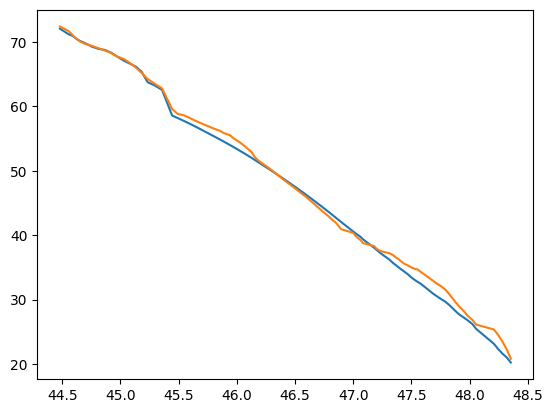

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006284946396793194
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.000598872225946945
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00055442070197458
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00054905326907312
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005812261873350933
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:1042: RuntimeWarning: invalid value encountered in divide
  q_star = np.fmin((size[...,0]* np.minimum(self.p.q_0,1-sep_star)+size[...,1]*np.minimum(q,1-sep_star1))/(size[...,0]*(1-sep_star)+size[...,1]*(1-sep_star1)),1)


Diff Rho: 0.0005294793498751888
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005469029716330413
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004800050104419409
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.309913597068807
Diff Rho: 0.00047399537344561596
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.3801435290443695
Diff Rho: 0.00042930984710335486
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 4.514358677343856
Diff Rho: 0.000402817409727456
sep jun borders 0.0 0.535174102165246
sep sen borders 0.0 1

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005109527915213868
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00046075146435940354
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005149673462123213
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004550309666594029
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00047346333249546663
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:187: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


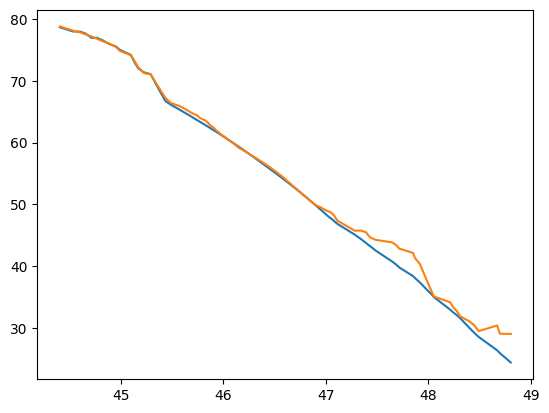

sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004099888115672215
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00040554580308080324
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004033090247408761
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0003899418781011647
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0003826485027683713
sep jun borders 0.0 1.0
sep sen borders 0.0 1.0
q_star [0.5       0.5001996 0.5003992 0.5005988 0.5007984 0.500998 ]
n0_star borders 0

SystemError: CPUDispatcher(<function n0 at 0x000002C7D5D01580>) returned a result with an exception set

In [5]:
# GE basic
if results_GE is not None:
    #mwc_GE_J = np.repeat(results_GE['J'], 6, axis=-1)
    mwc_GE_J =results_GE['J']   
    #mwc_GE_W = np.repeat(results_GE['W'], 6, axis=-2)
    mwc_GE_W =results_GE['W']   
    mwc_GE_U = results_GE['U']
    #mwc_GE_Rho = np.repeat(results_GE['Rho'], 6, axis=-1)
    mwc_GE_Rho =results_GE['Rho']   
    mwc_GE_P = results_GE['P']
    mwc_GE_kappa = results_GE['kappa']
    mwc_GE_sep_star = model.sep_star
    mwc_GE_n0_star = model.n0_star


#model=mwc_GE.J_sep(update_eq=1,s=20.0)
model=mwc_GE.J_sep(mwc_GE_J,mwc_GE_W,mwc_GE_U,mwc_GE_Rho,mwc_GE_P,mwc_GE_kappa,mwc_GE_n0_star,mwc_GE_sep_star,update_eq=1,s=20.0)

In [19]:
model.size.shape[4]

6

It doesn't seem fully consistent to me.  Firings are not monotone in size, which sounds v wrong.
Also, for some reason, firings don't respond to worker value??? If seniors are super duper cheap, what's the problem?

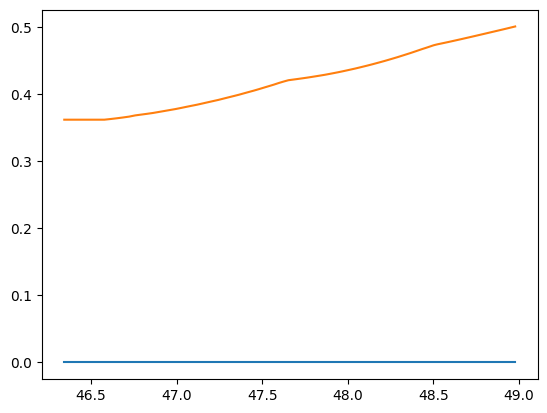

In [8]:
prod = p.z_0-2
j=3
s=1
minv= 0
q = 0

#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.Vf_J[prod,j,s,:,q])
#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.Jp[prod,j,s,:,q])
#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.EW_star[prod,j,s,:,q])

plt.plot(model.Vf_W[prod,j,s,:,q,1],model.n0_star[prod,j,s,:,q])
plt.plot(model.Vf_W[prod,j,s,:,q,1],model.sep_star[prod,j,s,:,q]) #Okay separations are trash. More separations at higher productivity. Found this at j1,s2,q0

57.8736267314858


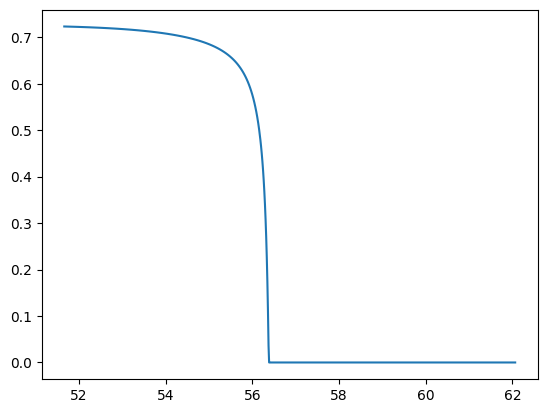

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

In [ ]:
from Multiworker_Contract_Spline import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc_Rho,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep(s=10.0)

In [11]:
objects['mwc_J'] = mwc_J
objects['mwc_W'] = mwc_W
objects['mwc_U'] = mwc_U
objects['mwc_Rho'] = mwc_Rho

In [ ]:
mwc_Rho_J = results['J']
mwc_Rho_W = results['W']
mwc_Rho_U = results['U']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
mwc_Rho_Rho = results['Rho']


from Multiworker_Contract_Tasmanian_light import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep()

In [4]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']

In [ ]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J_sep(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U)

In [7]:
objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho

In [ ]:

assert np.all(mwc.rho_grid[1:] >= mwc.rho_grid[ :-1])

In [26]:
np.array((mwc.points[:,0],mwc.points[:,1]))

array([[2.    , 2.    , 2.    , ..., 3.6875, 3.8125, 3.9375],
       [2.005 , 2.005 , 2.005 , ..., 2.005 , 2.005 , 2.005 ]])

In [29]:
# Exclude the 3rd dimension (index 2)
points_reduced = np.delete(mwc.points, 2, axis=1)

# Find unique combinations
unique_combinations = np.unique(points_reduced, axis=0)

print("Unique combinations of (a, b, d):")
print(unique_combinations)

Unique combinations of (a, b, d):
[[0.      0.01    0.5    ]
 [0.      0.01    0.53125]
 [0.      0.01    0.5625 ]
 ...
 [4.      4.      0.9375 ]
 [4.      4.      0.96875]
 [4.      4.      1.     ]]


In [30]:
unique_combinations.shape

(1073, 3)

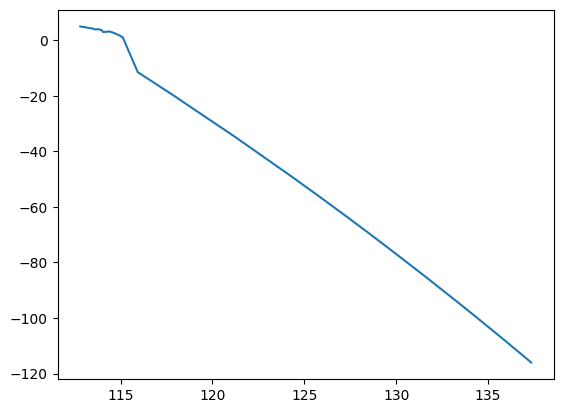

In [29]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

In [5]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)

115.11807503732125


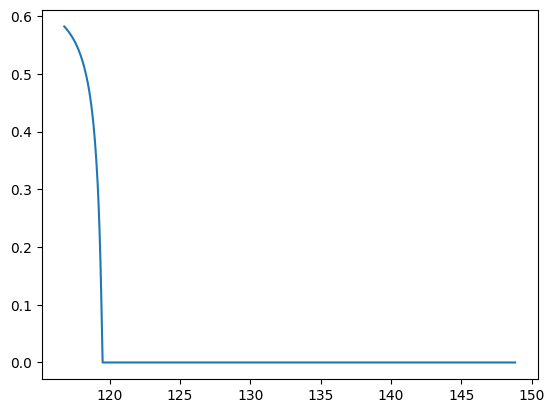

In [6]:
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

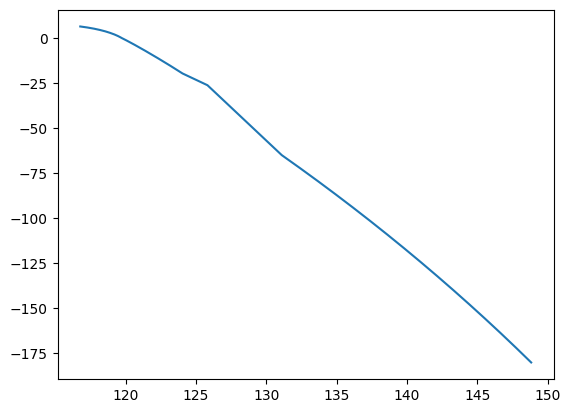

In [8]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

Tring to apply Tasmanian to the already evaluated J using interpolations.
Note: in the ideal Tasmanian scenario, I would instead directly evaluate J at the points suggested by Tasmanian! This would be essentially an endogenous grid method

In [5]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

(3, 200, 5, 4, 1, 1.0, 1.0, 1.0, 0.85, 0.25, 1.0)


In [8]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [71]:
from scipy.interpolate import RegularGridInterpolator

vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid, mwc_Rho.Q_grid), J, bounds_error=False, fill_value=None) (po) for po in points])


In [57]:
dim = 1
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja")

points = grid[1].getPoints()

In [59]:
sorted_indices = np.argsort(points[:, 0])  # for a 1D example
points_sorted = points[sorted_indices]
values_sorted = original_values[sorted_indices]


In [63]:
sorted_indices[25]

0

In [64]:
inverse_indices[sorted_indices]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [60]:
# Create an inverse mapping from sorted indices back to original
inverse_indices = np.zeros_like(sorted_indices)
inverse_indices[sorted_indices] = np.arange(len(sorted_indices))

# Use inverse_indices to rearrange the updated values back to the original order
updated_values = updated_values_sorted[inverse_indices]


NameError: name 'updated_values_sorted' is not defined

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import RegularGridInterpolator

J = objects['mwc_Rho_J']
W = objects['mwc_Rho_W']

J = J[p.z_0-1,...,0]

# Create a global sparse grid
dim = 3
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja", anisotropic_weights)
#Good methods: "clenshaw-curtis", rleja" maybe?, "gauss-patterson" kinda overdoes it, "leja" is good but requires higher depth (like 10)... still not many points though!


a = (mwc_Rho.N_grid[0]+1e-10,mwc_Rho.N_grid1[0]+1e-10,mwc_Rho.rho_grid[0]+1e-10)
b = (mwc_Rho.N_grid[-1]-1e-10,mwc_Rho.N_grid1[-1]-1e-10,mwc_Rho.rho_grid[-1]-1e-10)
grid[1].setDomainTransform(np.column_stack((a, b)))
# Get the points where Tasmanian wants J evaluated
points = grid[1].getPoints()  # shape = (N,4)
print ("Number of points", points.shape[0])

# Evaluate J at these points (our "given" data)
vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid), J, bounds_error=False, fill_value=None) (po) for po in points])

# Load these values into the Tasmanian grid
grid[1].loadNeededPoints(vals)

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
j= 0
s= 1
fixed_x0 = mwc_Rho.N_grid[j]
fixed_x1 = mwc_Rho.N_grid1[s]


# Create a range of points along x_2
x2_values = mwc_Rho.rho_grid[1:-2]
plot_points = np.zeros((197,3))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values


# Evaluate original function J at these slice points
original_values = np.array([J[j,s,1:-2]])[0,:]

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid[1].evaluateBatch(plot_points)[:,0]

Number of points 1729


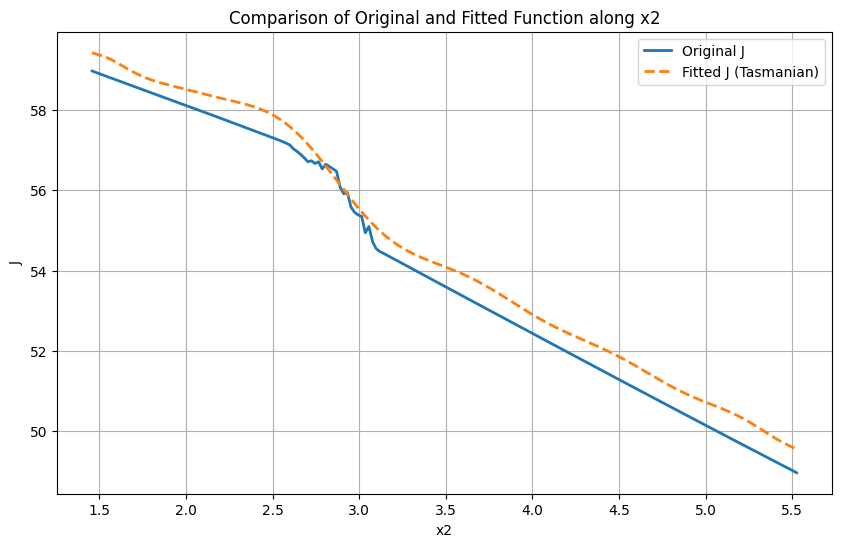

In [21]:
# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
j=0
s=0
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

tas_derivatives = []
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] #Derivative around coordinate 1
    tas_derivatives.append(dJdx1)

NameError: name 'deriv_points' is not defined

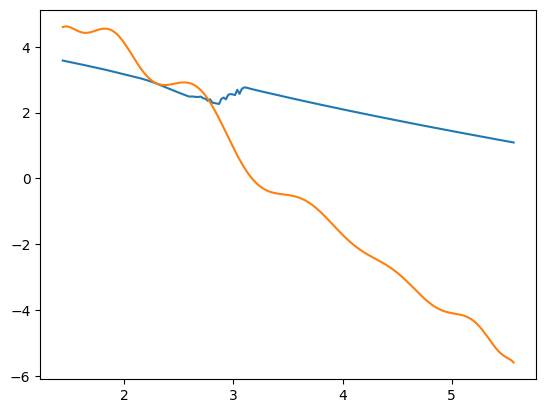

In [32]:
plt.plot(mwc_Rho.rho_grid,(J[j,3,:]-J[j,1,:])/2)
plt.plot(mwc_Rho.rho_grid,tas_derivatives)

In [30]:
#Getting derivatives around the original J values
# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = mwc_Rho.rho_grid# some test points for derivative

deriv_points = np.zeros((mwc_Rho.rho_grid.shape[0],3))
j=2
s=2
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += 1
    x_backward[dim] -= 1
    return (f[x_forward] - f[x_backward]) / (2)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J[j,:,v], pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference: {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


IndexError: arrays used as indices must be of integer (or boolean) type

Basic example

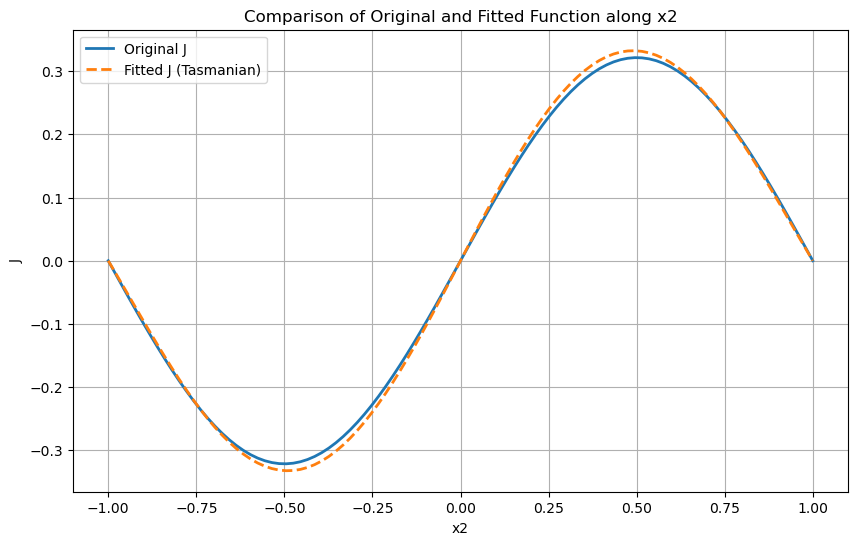

Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) 
---------------------------------------------------------------------
-0.800	+0.15936975	+0.20301242	+0.15574745
-0.720	+0.16197897	+0.22877791	+0.15778802
-0.640	+0.16053042	+0.24418361	+0.15592613
-0.560	+0.15461715	+0.24837205	+0.14979996
-0.480	+0.14402709	+0.24093288	+0.13923148
-0.400	+0.12877669	+0.22201060	+0.12425586
-0.320	+0.10912961	+0.19234678	+0.10513712
-0.240	+0.08559734	+0.15326637	+0.08236740
-0.160	+0.05892050	+0.10661701	+0.05664885
-0.080	+0.03003135	+0.05467114	+0.02885873
+0.000	+0.00000000	+0.00000000	+0.00000000
+0.080	-0.03003135	-0.05467114	-0.02885873
+0.160	-0.05892050	-0.10661701	-0.05664885
+0.240	-0.08559734	-0.15326637	-0.08236740
+0.320	-0.10912961	-0.19234678	-0.10513712
+0.400	-0.12877669	-0.22201060	-0.12425586
+0.480	-0.14402709	-0.24093288	-0.13923148
+0.560	-0.15461715	-0.24837205	-0.14979996
+0.640	-0.16053042	-0.24418361	-0.15592613
+0.720	-0.16197897	-0.22877791	-0.15778802

In [89]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
import time

# Define the 5D test function J
# J(x0,x1,x2,x3,x4) = exp(-x0^2 - x1^2)* sin(pi*x2)* cos(pi*x3) * (1 + x4^2)
def J(x):
    return (np.exp(-x[0]**2 - x[1]**2) 
            * np.sin(np.pi*x[2]) 
            * np.cos(np.pi*x[3]) 
            * (1.0 + x[4]**2))

# Let's pick which dimension to slice and which to differentiate:
# - We'll plot along x_2 (dimension=2), fixing x_0,x_1,x_3,x_4.
# - We'll differentiate along x_1 (dimension=1).

# Create a global sparse grid
dim = 5
outputs = 1
depth = 5
grid = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid.makeGlobalGrid(dim, outputs, depth, "level", "clenshaw-curtis")

# Get the points where Tasmanian wants J evaluated
points = grid.getPoints()  # shape = (N,5)

# Evaluate J at these points (our "given" data)
vals = np.array([[J(p)] for p in points])

# Load these values into the Tasmanian grid
grid.loadNeededPoints(vals)

# Now we have a fitted surrogate model using Tasmanian.

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
fixed_x0 = 0.0
fixed_x1 = 0.0
fixed_x3 = 0.4
fixed_x4 = -0.2

# Create a range of points along x_2
x2_values = np.linspace(-1, 1, 100)
plot_points = np.zeros((100,5))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values
plot_points[:,3] = fixed_x3
plot_points[:,4] = fixed_x4

# Evaluate original function J at these slice points
original_values = np.array([J(pt) for pt in plot_points])

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid.evaluateBatch(plot_points)[:,0]

# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = np.linspace(-0.8, 0.8, 21) # some test points for derivative
deriv_points = np.zeros((21,5))
deriv_points[:,0] = fixed_x0
deriv_points[:,1] = test_points  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = 0.2   # fix other dimensions
deriv_points[:,3] = fixed_x3
deriv_points[:,4] = fixed_x4

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += h
    x_backward[dim] -= h
    return (f(x_forward) - f(x_backward)) / (2.0*h)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_original = []
start_fd_orig = time.perf_counter()
for pt in deriv_points:
    fd_original.append(finite_diff_derivative(J, pt, dim=1))
end_fd_orig = time.perf_counter()
fd_orig_time = end_fd_orig - start_fd_orig
fd_original = np.array(fd_original)

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J, pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, fd_original, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{fd_orig_val:+1.8f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (original): {fd_orig_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (fitted): {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


Testing derivative speed: Tasmanian vs Finite Diff

In [77]:
import numpy as np
import Tasmanian

def f(x):
    # f(x) = sin(x)*exp(-x^2)
    return np.sin(x[0]) * np.exp(-x[0]**2)

def fprime(x):
    # f'(x) = cos(x)*exp(-x^2) - 2x*sin(x)*exp(-x^2)
    return (np.cos(x[0])*np.exp(-x[0]**2)) - (2*x[0]*np.sin(x[0])*np.exp(-x[0]**2))

# Create a global sparse grid
grid = Tasmanian.TasmanianSparseGrid()
grid.makeGlobalGrid(1, 1, 5, "level", "gauss-legendre")

# Get the points and load function values
interp_points = grid.getPoints()
vals = np.array([[f(pt)] for pt in interp_points])
grid.loadNeededPoints(vals)

# Points at which to differentiate
test_points = np.linspace(-1.0, 1.0, 11).reshape((11, 1))

approx_derivatives = []
for p in test_points:
    # Ensure p is passed as a simple list/array of floats
    x_list = p[0]  # Convert to a simple Python list with one element
    jac = grid.differentiate(x_list)
    # If jac is scalar, just append jac directly
    # If it's an array, you'd do jac[0], but likely it's scalar
    approx_derivatives.append(jac)

approx_derivatives = np.array(approx_derivatives)

exact_derivatives = np.array([fprime(p) for p in test_points])

print("x\t\tExact Derivative\tApprox Derivative\tError")
print("-------------------------------------------------------------")
for i, p in enumerate(test_points):
    approx = approx_derivatives[i]
    exact = exact_derivatives[i]
    error = abs(exact - approx)/abs(exact)
    print(f"{p[0]:+1.4f}\t{exact:+1.8f}\t{approx:+1.8f}\t{error:+1.8f}")


x		Exact Derivative	Approx Derivative	Error
-------------------------------------------------------------
-1.0000	-0.42035364	-0.22111074	+0.47398875
-0.8000	-0.23784212	-0.25215458	+0.06017632
-0.6000	+0.10309190	+0.08867878	+0.13980841
-0.4000	+0.51940407	+0.52765542	+0.01588620
-0.2000	+0.86528586	+0.86925111	+0.00458258
+0.0000	+1.00000000	+0.99615128	+0.00384872
+0.2000	+0.86528586	+0.86925111	+0.00458258
+0.4000	+0.51940407	+0.52765542	+0.01588620
+0.6000	+0.10309190	+0.08867878	+0.13980841
+0.8000	-0.23784212	-0.25215458	+0.06017632
+1.0000	-0.42035364	-0.22111074	+0.47398875


## Older stuff: Spline fitting

In [ ]:
from scipy.interpolate import UnivariateSpline

# Spline Fitting
def fit_spline(W, J1, smoothness=0):
    """
    Fit a Univariate Spline to the data.

    Parameters:
    - W: Input grid points.
    - J1: Observed values at grid points.
    - smoothness: Smoothing factor. Larger values result in smoother fits.
      Default of 0 results in an interpolating spline.

    Returns:
    - spline: Fitted spline object.
    """
    spline = UnivariateSpline(W, J1, s=smoothness)
    return spline

# Fit the spline (adjust smoothness if needed)
smoothness_factor = 0.1  # Adjust this based on your needs
spline = fit_spline(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], smoothness=smoothness_factor)

In [ ]:
# Evaluate the spline over a fine grid
W_fine = np.linspace(mwc_Rho_W[2,2,2,:,0,1].min(), mwc_Rho_W[2,2,2,:,0,1].max(), 500)
J1_spline = spline(W_fine)

# Plot the Results
plt.figure(figsize=(8, 5))
plt.scatter(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], label="Observed Data", color="blue", alpha=0.7)
#plt.plot(W_fine, true_function, label="True Function (Ground Truth)", color="green", linestyle="--")
plt.plot(W_fine, J1_spline, label="Spline Approximation", color="red")
plt.xlabel("W")
plt.ylabel("J1")
plt.title("Spline Fitting to Capture Concavity")
plt.legend()
plt.show()

# Access Spline Derivatives
first_derivative = spline.derivative(n=1)(W_fine)  # First derivative
delta_second_derivative = spline.derivative(n=2)(W_fine)  # Second derivative